In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("auto_data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   make              205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

#### >>> Doesn't contain null values.

In [4]:
df['make'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [5]:
Company = df['make'].apply(lambda x : x.split(' ')[0])
df.insert(2,"Company",Company)
df.drop(['make'],axis=1,inplace=True)
df.head()

,symboling,Company,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
df['Company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [7]:
df.Company = df.Company.str.lower()

def replace(a,b):
    df.Company.replace(a,b,inplace=True)

replace('maxda','mazda')
replace('porcshce','porsche')
replace('toyouta','toyota')
replace('vokswagen','volkswagen')
replace('vw','volkswagen')

df.Company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

### Perform EDA on the Data

In [8]:
num_feature=[]
cat_feature=[]
for i in df.columns:
    if df[i].dtypes=='O':
        cat_feature.append(i)
    else:
        num_feature.append(i)

In [9]:
print("Numerical Feature=",num_feature)
print()
print("Categorical Feature=",cat_feature)

Numerical Feature= ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

Categorical Feature= ['Company', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


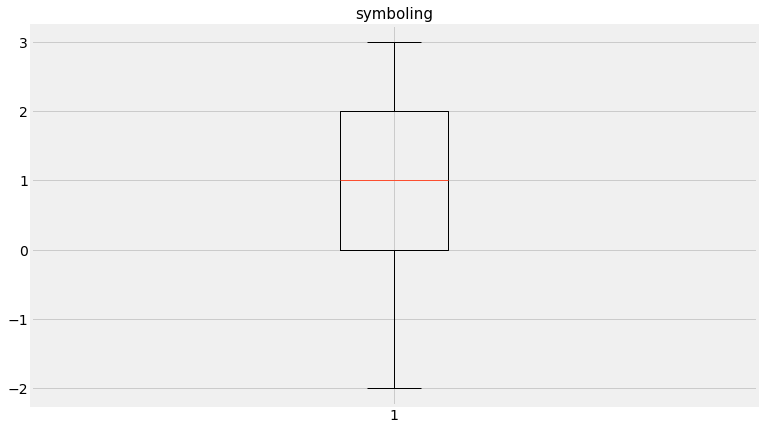

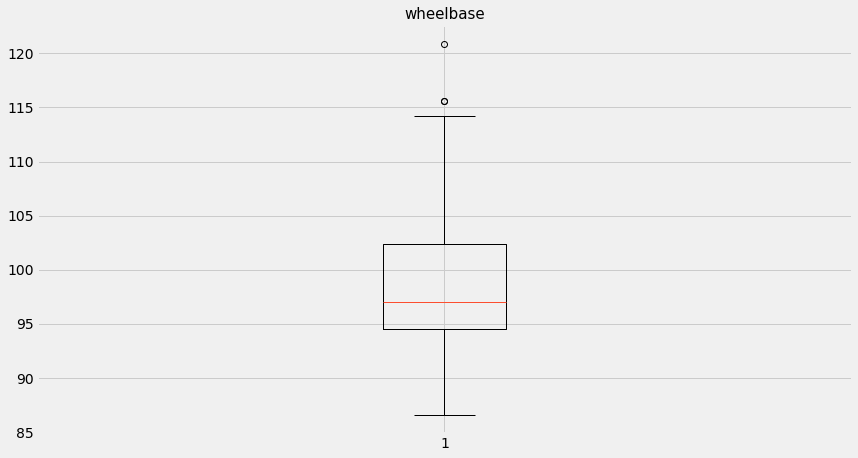

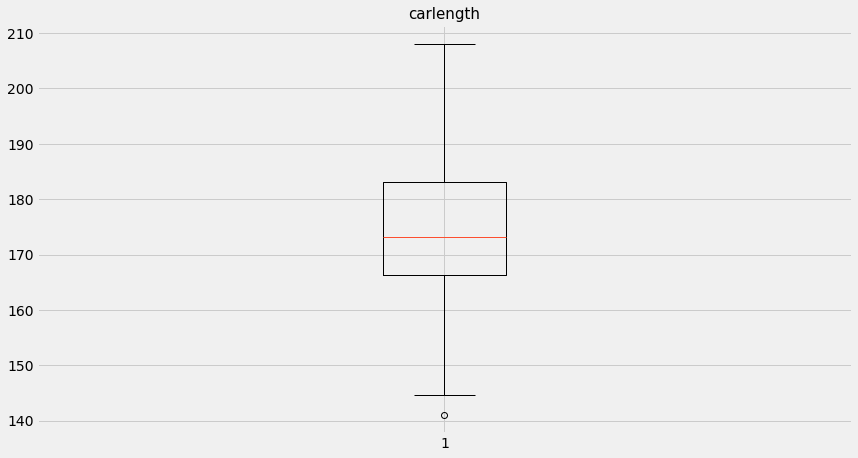

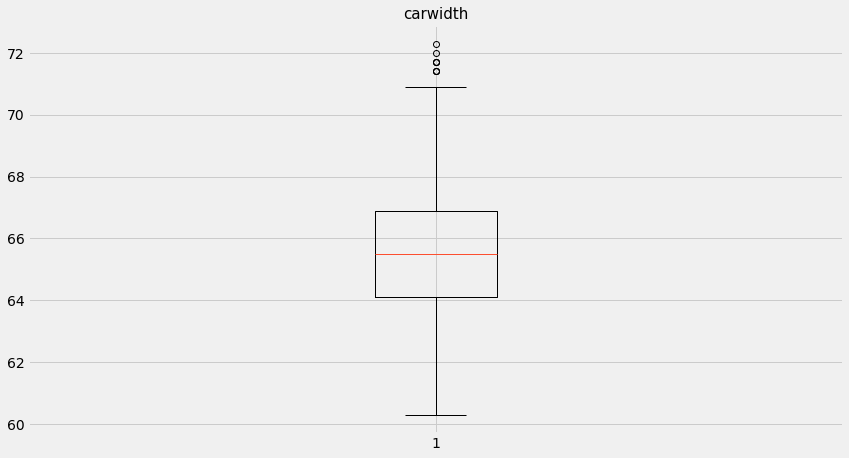

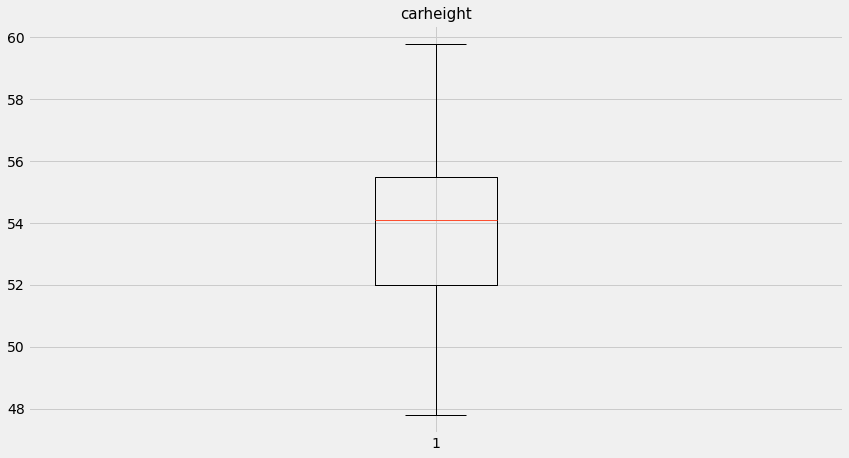

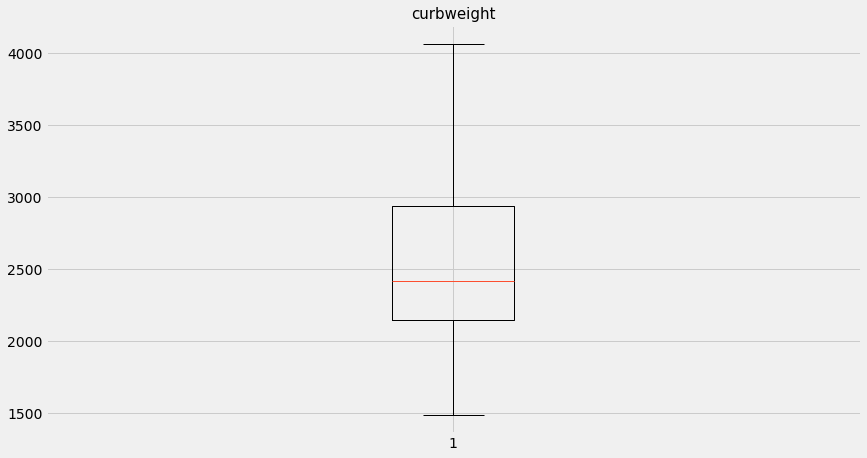

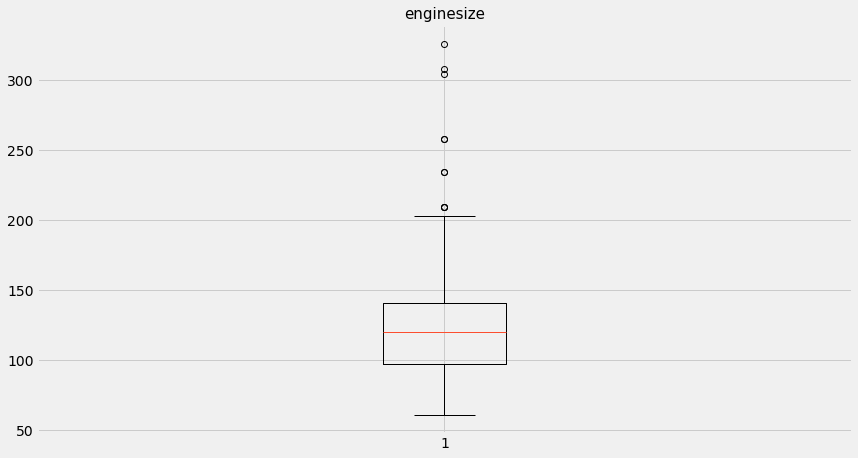

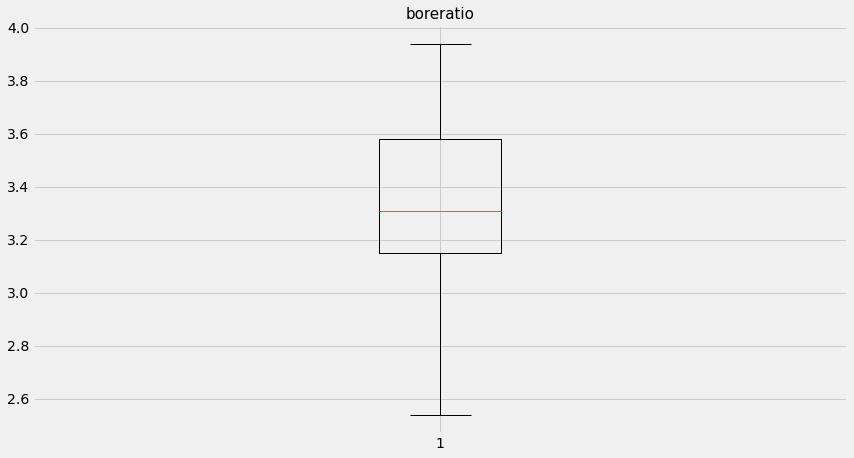

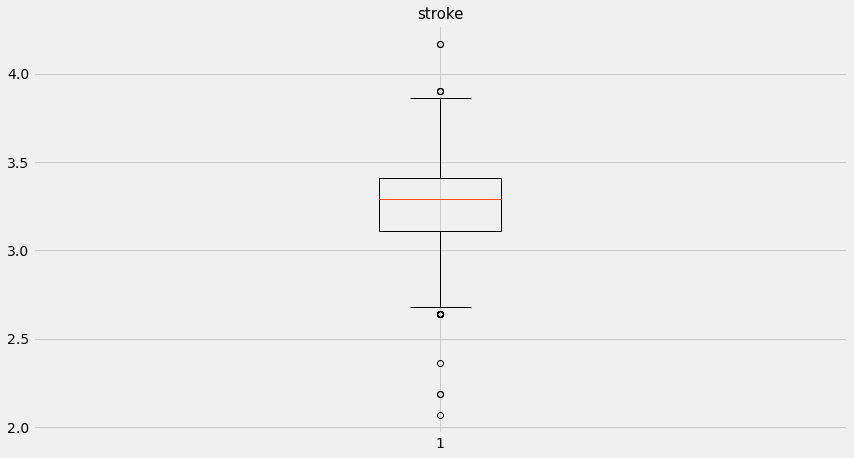

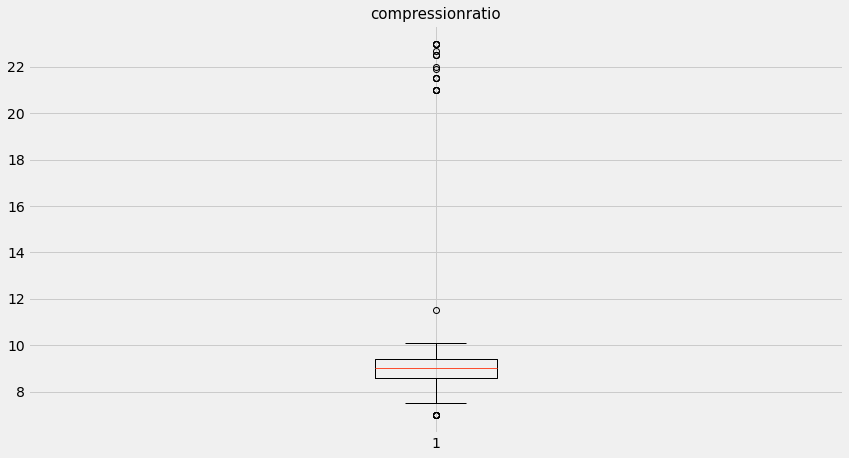

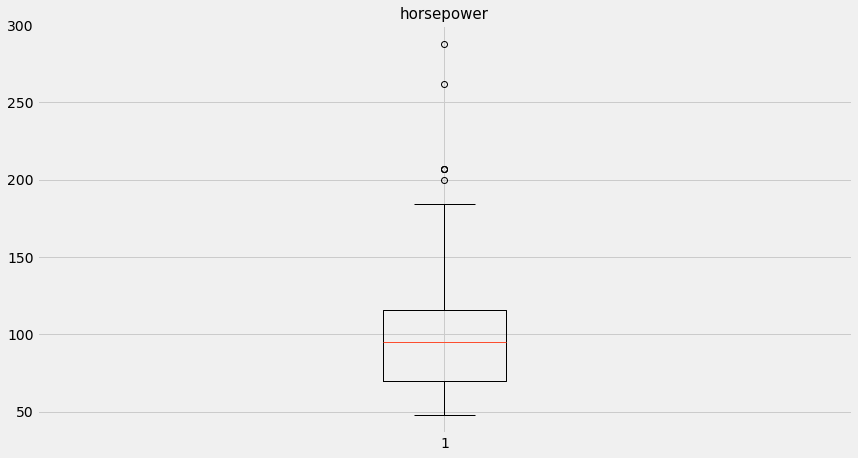

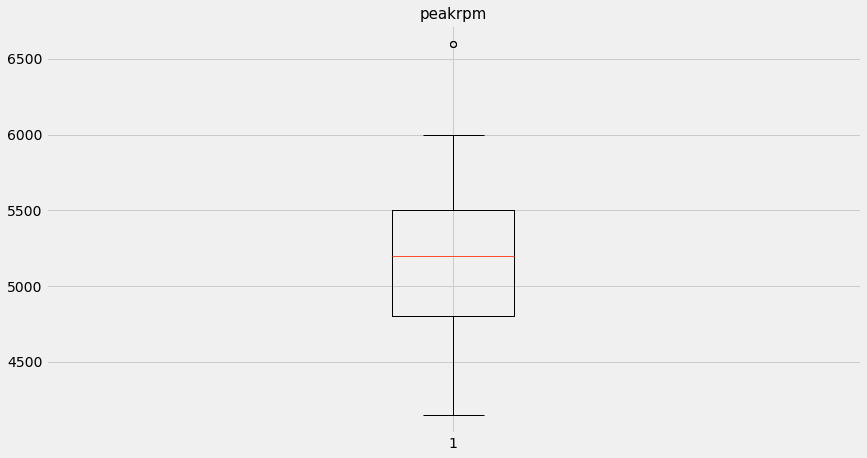

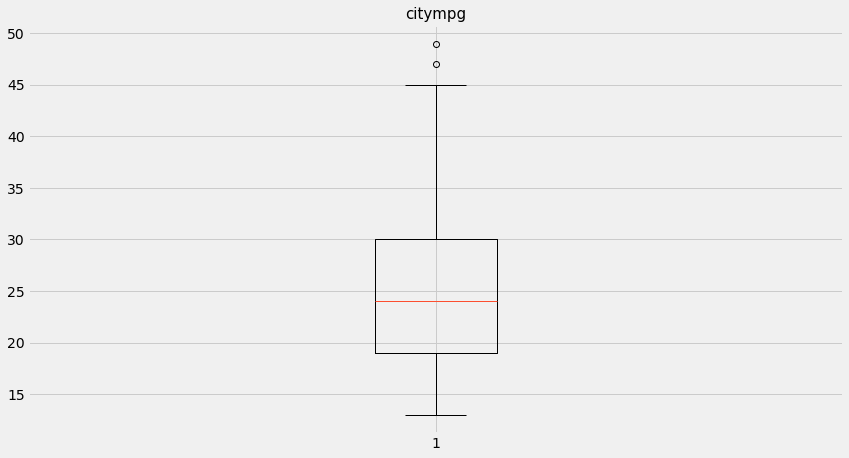

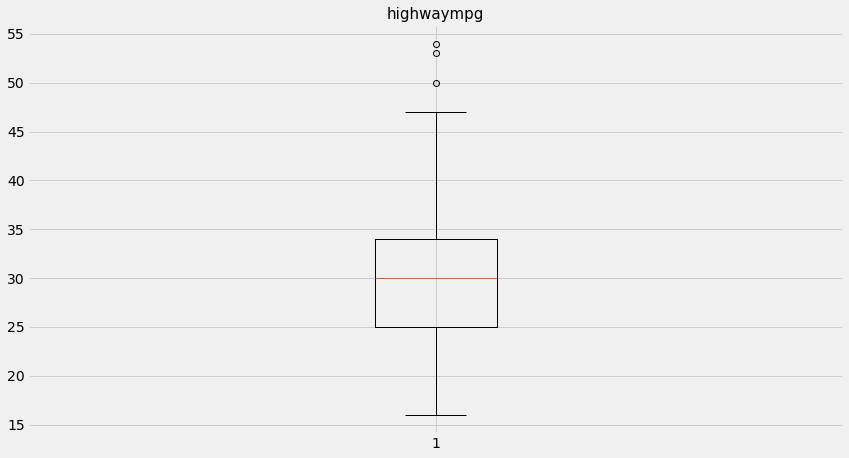

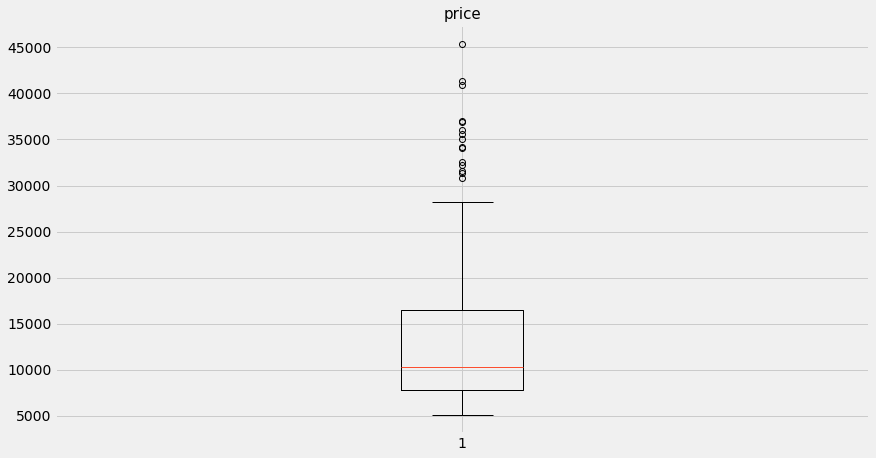

In [10]:
for i in num_feature:
    plt.figure(figsize=(13,7))
    plt.style.use('fivethirtyeight')
    plt.boxplot(df[i])
    plt.title(i, fontsize=15)

Text(0.5, 1.0, 'Correlation Between Numerical Features')

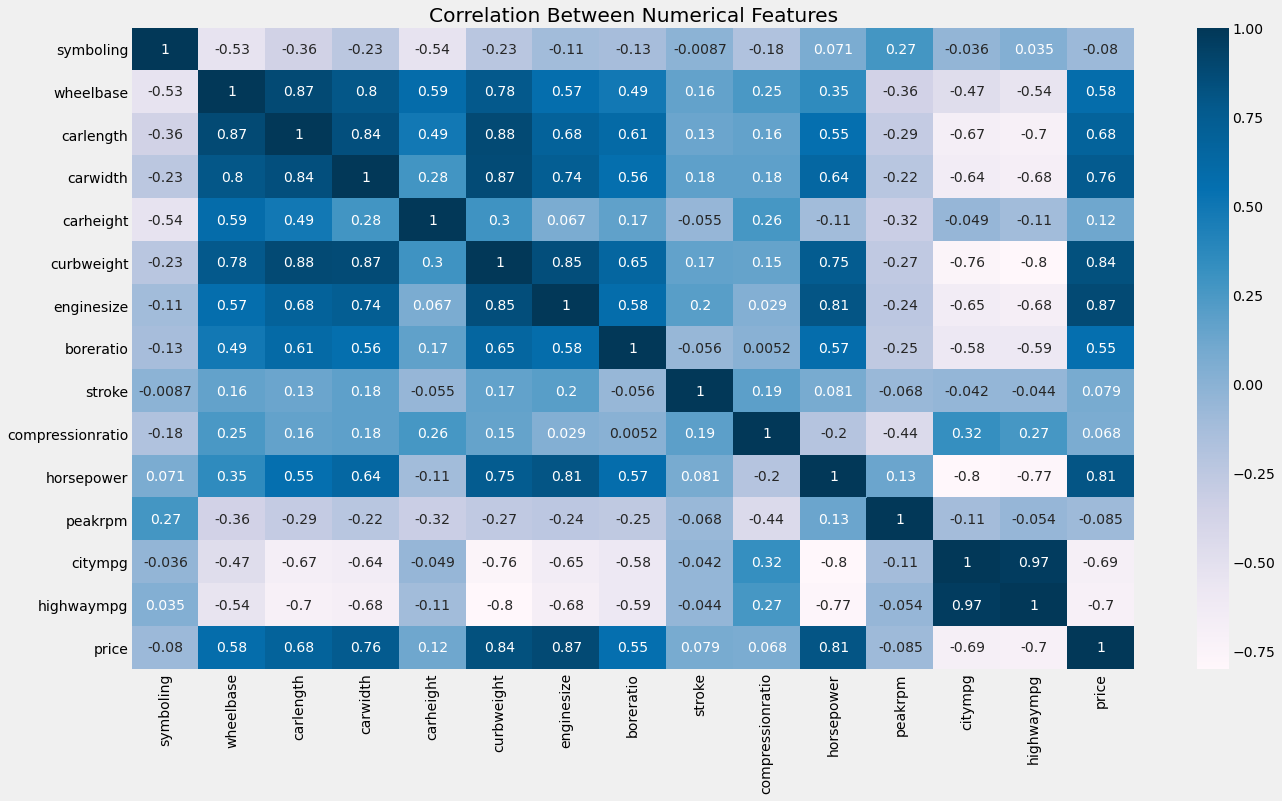

In [11]:
plt.figure(figsize=(20,11))
sn.heatmap(df.corr(),annot=True,cmap='PuBu')
plt.title("Correlation Between Numerical Features")

#### >>> enginesize, curbweight, horsepower, carwidth, carlength have good +ve correlation with the target variable i.e. price.
#### >>> highwaympg, citympg have good -ve correlation with price.

In [12]:
df['mileage'] = df['citympg']*0.55 + df['highwaympg']*0.45

Text(0, 0.5, 'Price')

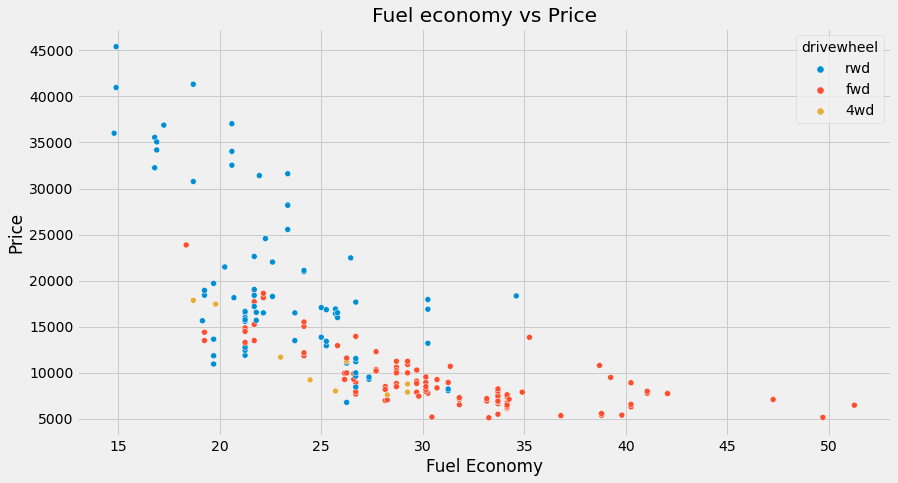

In [13]:
plt.figure(figsize=(13,7))
plt.title('Fuel economy vs Price')
sn.scatterplot(x=df['mileage'],y=df['price'],hue=df['drivewheel'])
plt.xlabel('Fuel Economy')
plt.ylabel('Price')

### Categorical Variables Visualisation

Text(0, 0.5, 'Frequency')

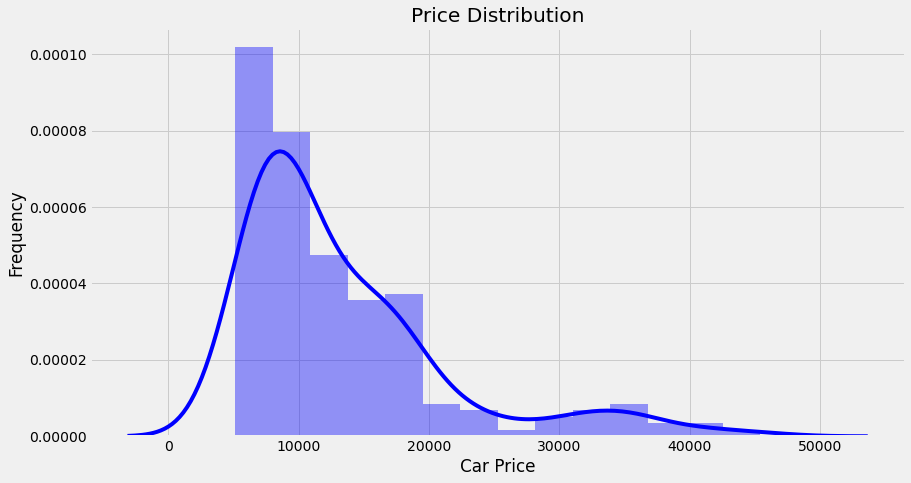

In [14]:
plt.figure(figsize=(13,7))
sn.distplot(df['price'],color='b')
plt.title('Price Distribution')
plt.xlabel('Car Price')
plt.ylabel('Frequency')

Text(0.5, 0, 'Fuel-Type')

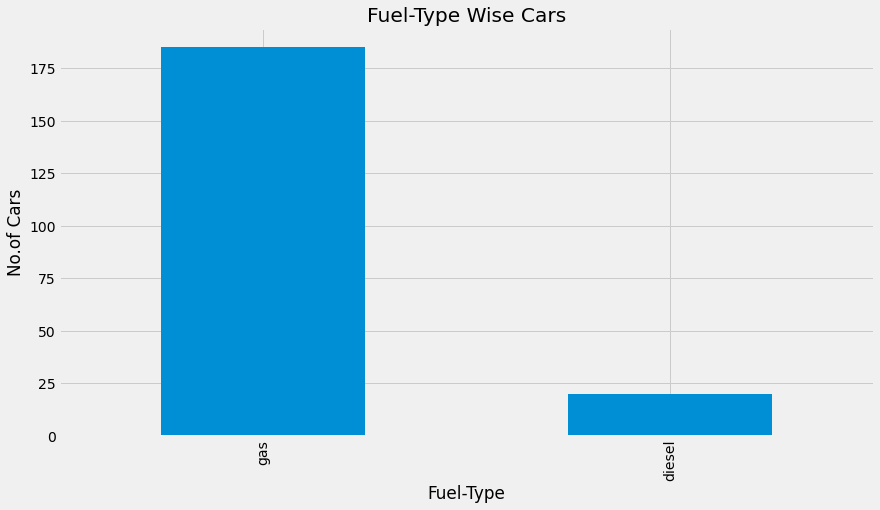

In [15]:
plt.figure(figsize=(13,7))
df['fueltype'].value_counts().plot.bar()
plt.title('Fuel-Type Wise Cars')
plt.ylabel('No.of Cars')
plt.xlabel('Fuel-Type')

#### >>> Gas type cars are more preferrable over diesel type cars.

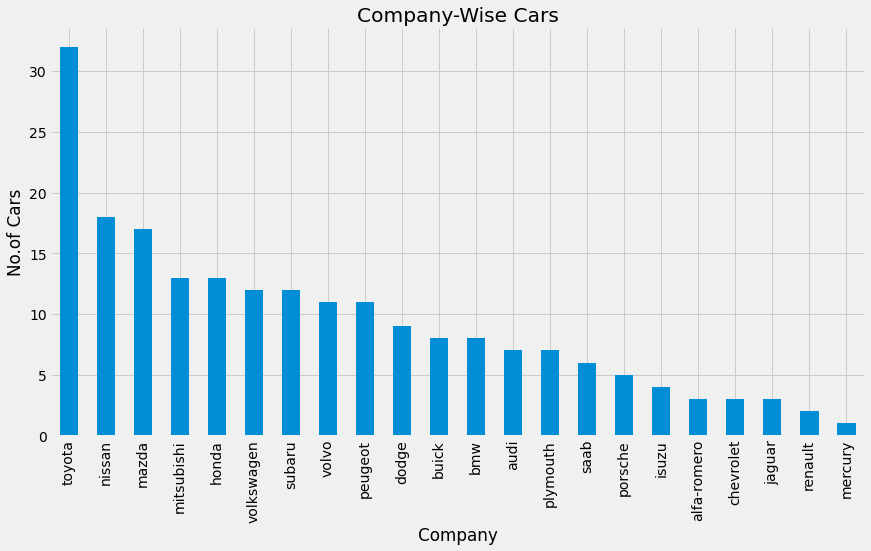

In [16]:
plt.figure(figsize=(13,7))
df['Company'].value_counts().plot.bar()
plt.title('Company-Wise Cars')
plt.ylabel('No.of Cars')
plt.xlabel('Company');

#### Highest sold cars- Toyota, Lowest sold cars- Mercury

Text(0.5, 0, 'Body-Type')

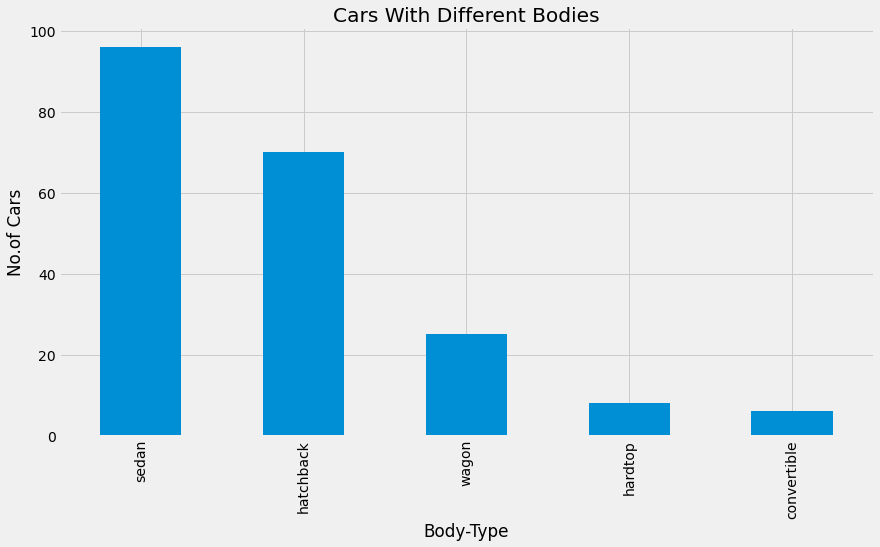

In [17]:
plt.figure(figsize=(13,7))
df['carbody'].value_counts().plot.bar()
plt.title('Cars With Different Bodies')
plt.ylabel('No.of Cars')
plt.xlabel('Body-Type')

#### >>> Sedan is preferred over other body types.

Text(0, 0.5, 'Drive Wheels')

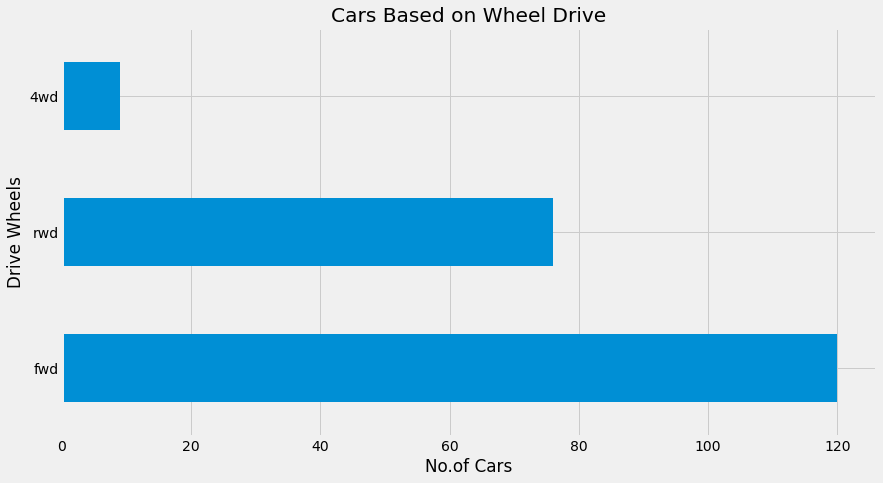

In [18]:
plt.figure(figsize=(13,7))
df['drivewheel'].value_counts().plot.barh()
plt.title('Cars Based on Wheel Drive')
plt.xlabel('No.of Cars')
plt.ylabel('Drive Wheels')

Text(0.5, 0, 'Risk Factor')

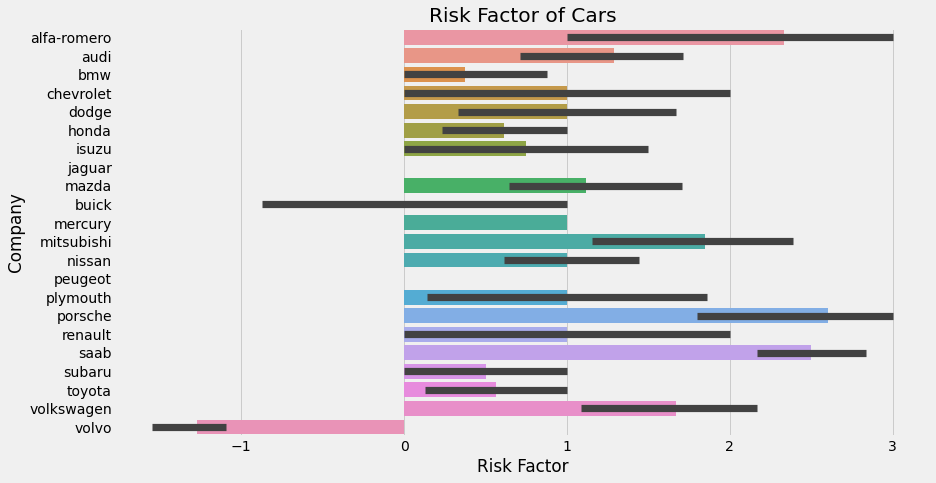

In [19]:
plt.figure(figsize=(13,7))
sn.barplot(x = df['symboling'], y = df['Company'])
plt.title('Risk Factor of Cars')
plt.ylabel('Company')
plt.xlabel('Risk Factor')

#### >>> Volvo cars has lowest risk factor.

Text(0, 0.5, 'Company Name')

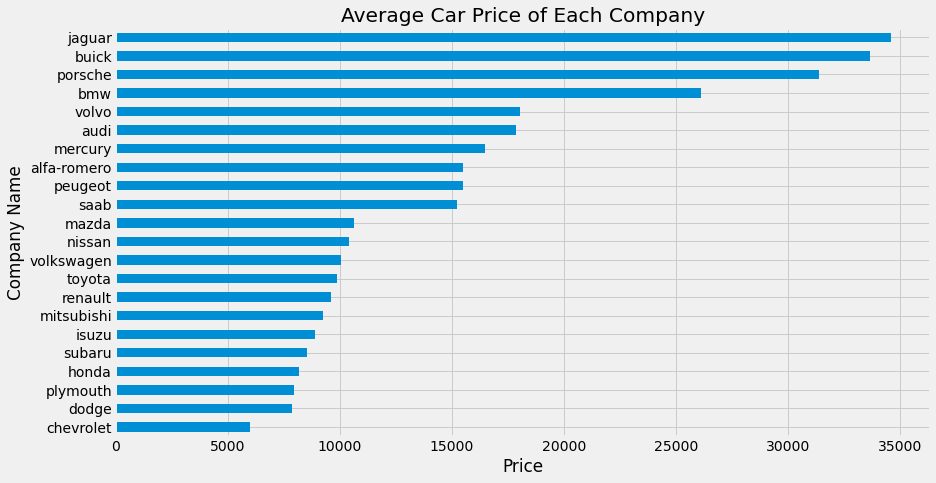

In [20]:
cc=df.groupby('Company')['price'].mean()
kk=cc.sort_values(ascending=True)
plt.figure(figsize=(13,7))
kk.plot.barh()
plt.title('Average Car Price of Each Company')
plt.xlabel('Price')
plt.ylabel('Company Name')

#### >>> Jaguar & Buick has highest price. Chevrolet - Lowest

### How different cat features behaving with price

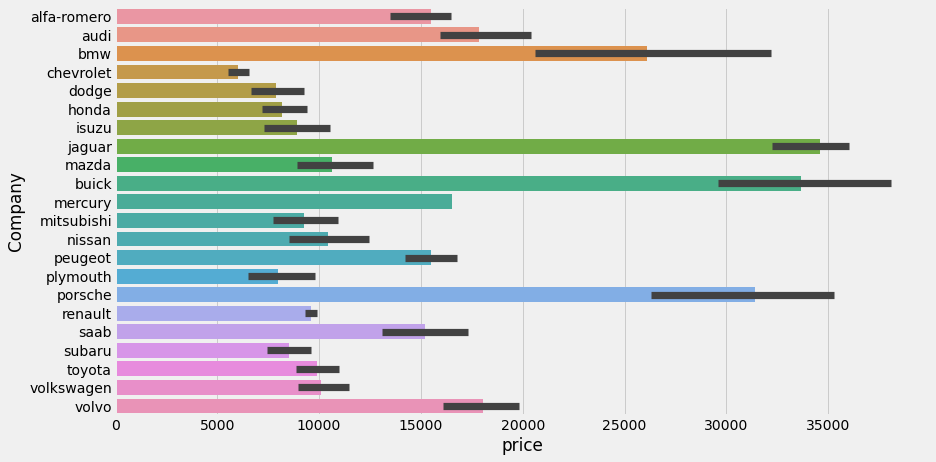

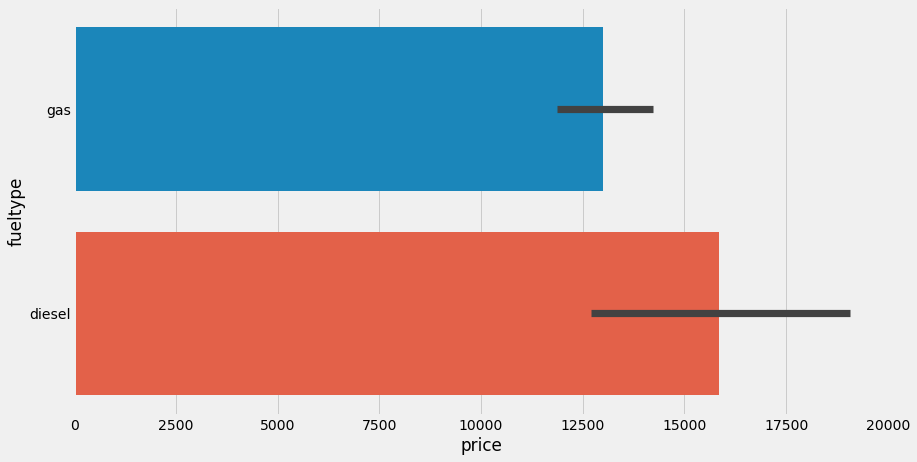

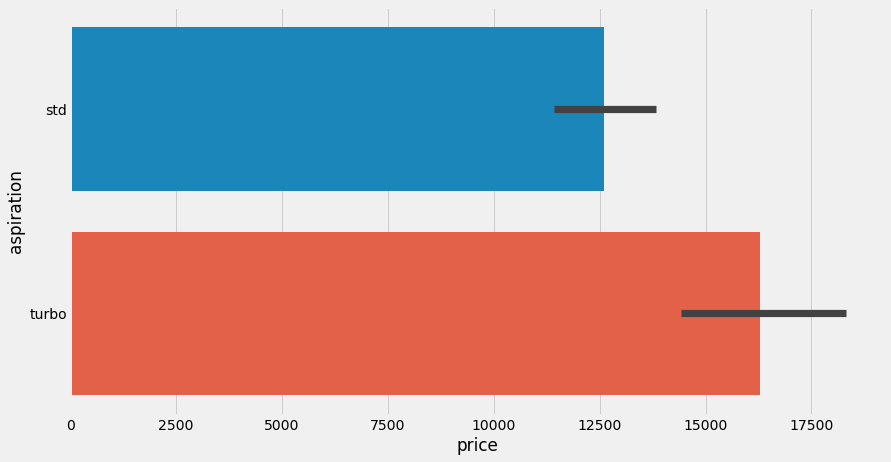

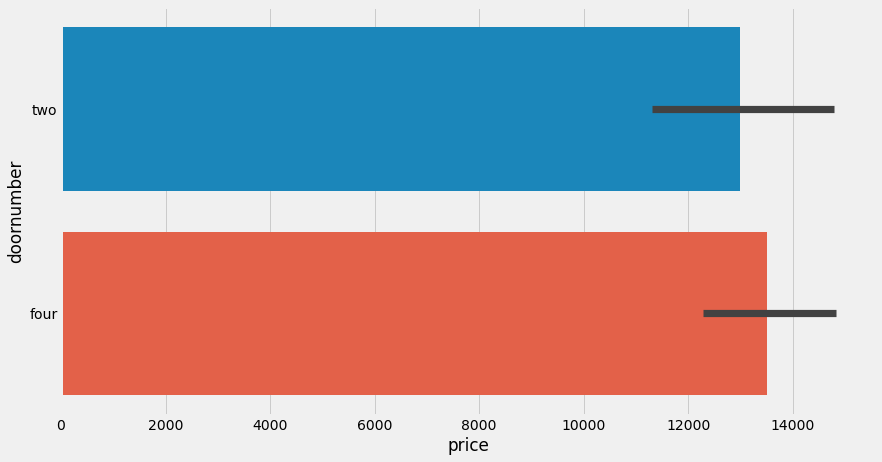

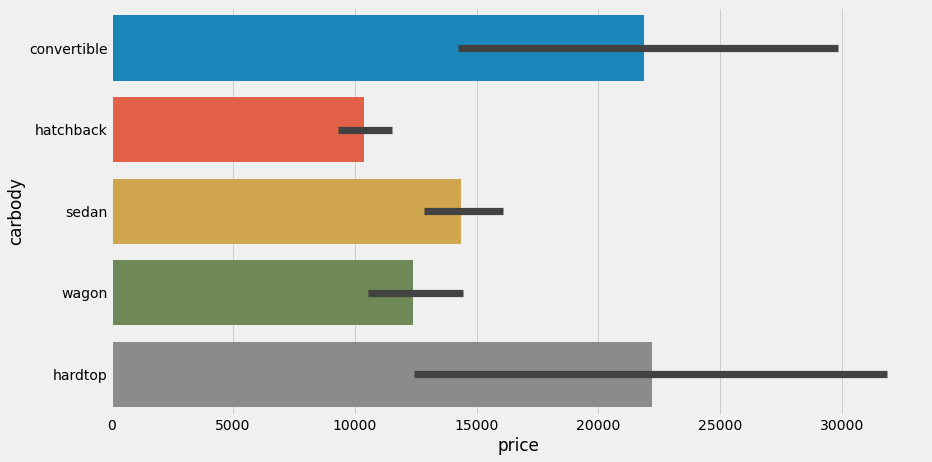

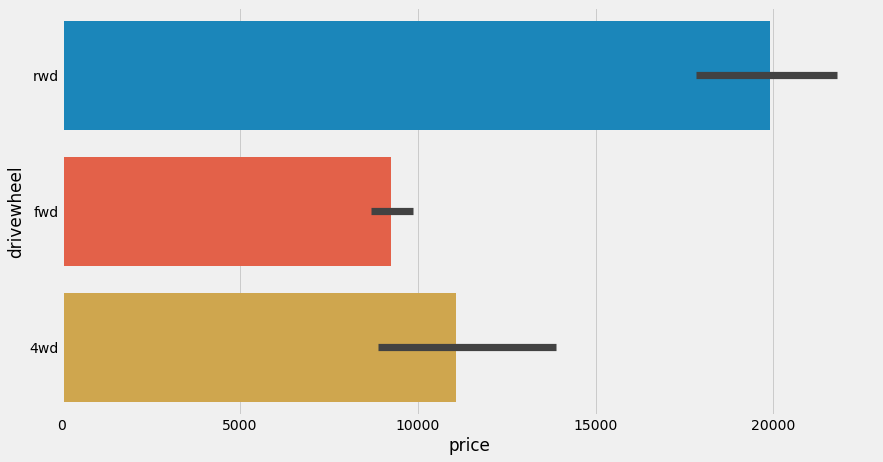

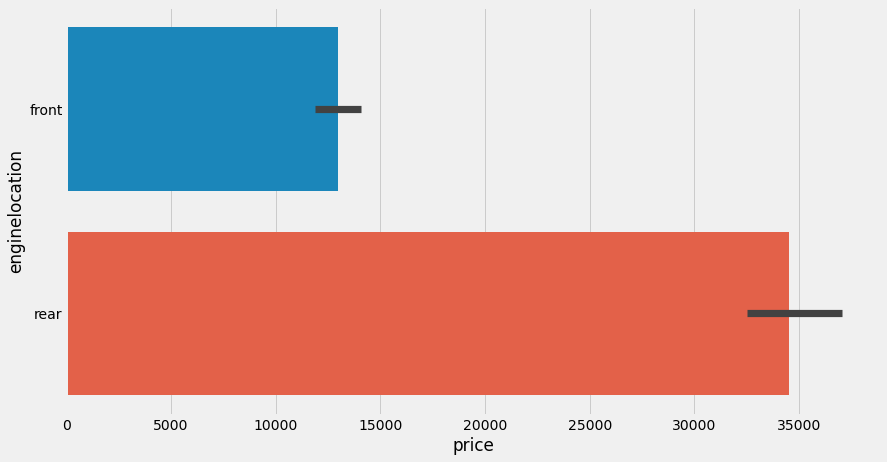

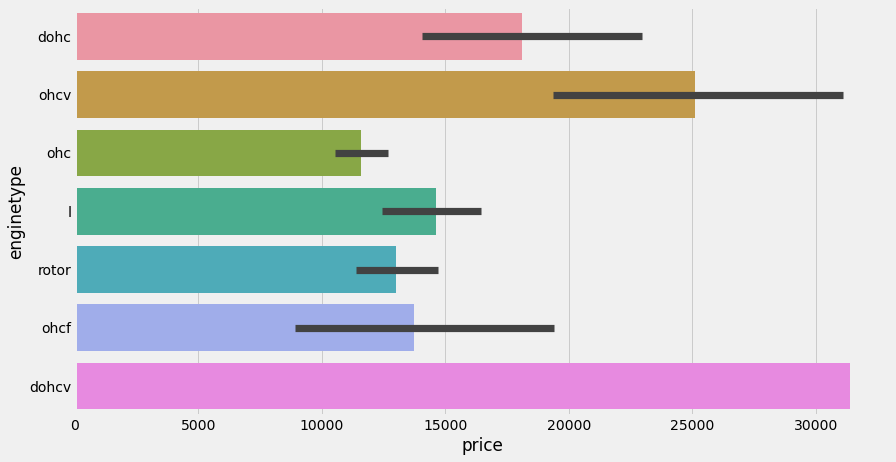

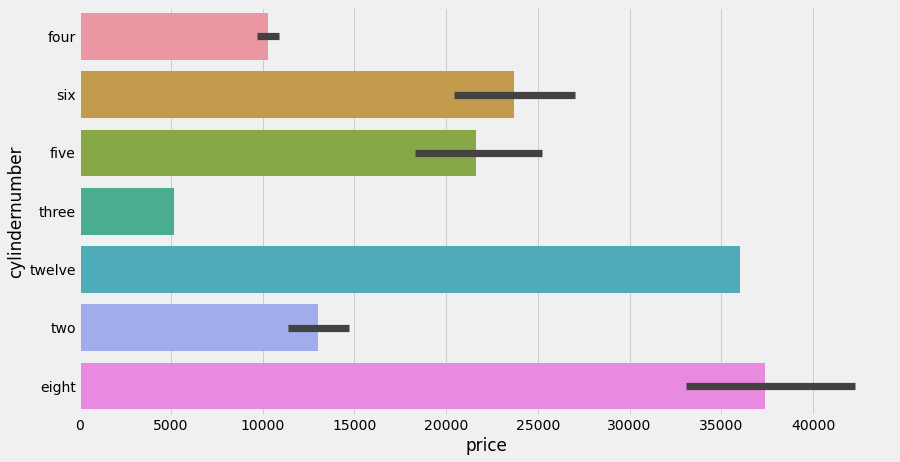

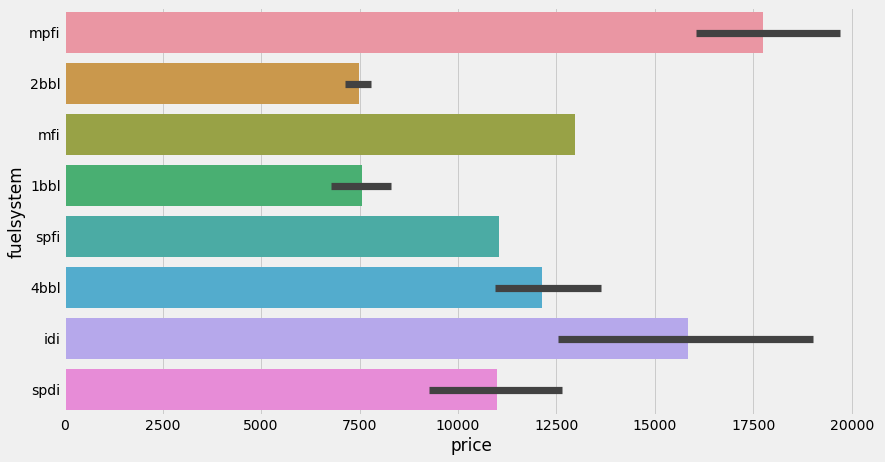

In [21]:
for i in cat_feature:
    plt.figure(figsize=(13,7))
    sn.barplot(df['price'], df[i])
    plt.show()

### Pick the best variable for making a simple linear regression model

#### >>> Since enginesize has the highest correlation with price. Therefore, using this in the making of model.

### Label Encoding

In [22]:
from sklearn.preprocessing import LabelEncoder
df2 = df[cat_feature].apply(LabelEncoder().fit_transform)

In [23]:
df3 = df2.join(df[num_feature])
df3.head()

,Company,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,...,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,0,1,0,1,0,2,0,0,2,5,...,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,0,1,0,1,0,2,0,0,2,5,...,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,0,1,0,1,2,2,0,5,3,5,...,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,1,1,0,0,3,1,0,3,2,5,...,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,1,1,0,0,3,0,0,3,1,5,...,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


### Train Test Split

In [24]:
x = df3[['enginesize']]
y = df3[['price']] 

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=1)

### Build model using best variable and report the R2

In [26]:
from sklearn.linear_model import LinearRegression
LR= LinearRegression()

In [27]:
LR.fit(x_train,y_train)

LinearRegression()

In [28]:
y_pred = LR.predict(x)
print('Actual Price is', y.head())
print('\nPredicted Price is', y_pred[:5])

Actual Price is      price
0  13495.0
1  16500.0
2  16500.0
3  13950.0
4  17450.0

Predicted Price is [[13819.45192044]
 [13819.45192044]
 [17590.81037484]
 [10219.51885032]
 [14848.00422618]]


In [29]:
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y, y_pred)
print('Relationship between X and Y is', round(r2*100,2), '%')

Relationship between X and Y is 76.37 %


#### >>> R2 is 76.37%

In [30]:
from sklearn import metrics
print('MSE:', metrics.mean_squared_error(y, y_pred))
print('MAE:', metrics.mean_absolute_error(y, y_pred))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y, y_pred)))

MSE: 15004389.431696571
MAE: 2795.0416770901056
RMSE: 3873.549977952598


### Make a multiple regression model
#### Apply feature selection approaches discussed in the class

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df3[num_feature] = scaler.fit_transform(df3[num_feature])
df3.head()

,Company,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,...,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,0,1,0,1,0,2,0,0,2,5,...,0.411171,0.260377,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,0.207959
1,0,1,0,1,0,2,0,0,2,5,...,0.411171,0.260377,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,0.282558
2,0,1,0,1,2,2,0,5,3,5,...,0.517843,0.343396,0.100000,0.666667,0.1250,0.441667,0.346939,0.166667,0.263158,0.282558
3,1,1,0,0,3,1,0,3,2,5,...,0.329325,0.181132,0.464286,0.633333,0.1875,0.225000,0.551020,0.305556,0.368421,0.219254
4,1,1,0,0,3,0,0,3,1,5,...,0.518231,0.283019,0.464286,0.633333,0.0625,0.279167,0.551020,0.138889,0.157895,0.306142


In [32]:
a = df3.drop('price', axis=1)
b = df3['price']

In [33]:
a_train,a_test,b_train,b_test= train_test_split(a,b,test_size=0.3,random_state=1)

In [34]:
LR= LinearRegression()

In [35]:
LR.fit(a_train,b_train)

LinearRegression()

### RFE

In [36]:
from sklearn.feature_selection import RFE
rfe= RFE(LR,10)
rfe = rfe.fit(a_train, b_train)

In [37]:
rfe.support_

array([False,  True, False, False, False, False,  True, False, False,
       False, False,  True,  True,  True, False,  True,  True, False,
        True,  True, False,  True, False, False])

In [38]:
list(zip(a_train.columns,rfe.support_,rfe.ranking_))

[('Company', False, 12),
 ('fueltype', True, 1),
 ('aspiration', False, 10),
 ('doornumber', False, 8),
 ('carbody', False, 9),
 ('drivewheel', False, 6),
 ('enginelocation', True, 1),
 ('enginetype', False, 14),
 ('cylindernumber', False, 13),
 ('fuelsystem', False, 15),
 ('symboling', False, 7),
 ('wheelbase', True, 1),
 ('carlength', True, 1),
 ('carwidth', True, 1),
 ('carheight', False, 5),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', False, 4),
 ('stroke', True, 1),
 ('compressionratio', True, 1),
 ('horsepower', False, 11),
 ('peakrpm', True, 1),
 ('citympg', False, 2),
 ('highwaympg', False, 3)]

In [39]:
a_train.columns[rfe.support_]

Index(['fueltype', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'curbweight', 'enginesize', 'stroke', 'compressionratio', 'peakrpm'],
      dtype='object')

In [40]:
a_train_rfe=a_train[a_train.columns[rfe.support_]]
a_train_rfe.head()

,fueltype,enginelocation,wheelbase,carlength,carwidth,curbweight,enginesize,stroke,compressionratio,peakrpm
124,1,0,0.271137,0.479104,0.500000,0.515904,0.358491,0.852381,0.0000,0.346939
181,1,0,0.521866,0.697015,0.516667,0.645074,0.377358,0.609524,0.1375,0.428571
154,1,0,0.265306,0.426866,0.275000,0.311094,0.116981,0.457143,0.1250,0.265306
53,1,0,0.189504,0.383582,0.325000,0.177269,0.113208,0.514286,0.1250,0.346939
94,1,0,0.230321,0.361194,0.291667,0.179597,0.135849,0.580952,0.1500,0.428571


### VIF and Summary

In [41]:
import statsmodels.api as sm

In [42]:
# Model 1
def model(a,b):
    a = sm.add_constant(a)
    lm = sm.OLS(b,a).fit() 
    print(lm.summary()) 
    return a

In [43]:
a_train_new = model(a_train_rfe,b_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     105.8
Date:                Sun, 12 Sep 2021   Prob (F-statistic):           5.50e-58
Time:                        07:20:35   Log-Likelihood:                 184.78
No. Observations:                 143   AIC:                            -347.6
Df Residuals:                     132   BIC:                            -315.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0711      0.174  

In [44]:
# Dropping compressionratio as it has pvalue > 0.05
a_train_new = a_train_new.drop(["compressionratio"], axis = 1)

In [45]:
# Model 2
a_train_new = model(a_train_new,b_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     117.2
Date:                Sun, 12 Sep 2021   Prob (F-statistic):           9.05e-59
Time:                        07:20:35   Log-Likelihood:                 184.12
No. Observations:                 143   AIC:                            -348.2
Df Residuals:                     133   BIC:                            -318.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1169      0.041     -2.

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def VIF(a):
    vif = pd.DataFrame()
    vif['Features'] = a.columns
    vif['VIF'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [47]:
VIF(a_train_new)

,Features,VIF
0,const,49.39
6,curbweight,9.28
4,carlength,7.96
3,wheelbase,5.47
7,enginesize,4.93
5,carwidth,4.79
1,fueltype,1.78
9,peakrpm,1.75
2,enginelocation,1.55
8,stroke,1.20


In [48]:
# Dropping curbweight which has highest VIF
a_train_new = a_train_new.drop(["curbweight"], axis = 1)

In [49]:
# Model 3
a_train_new = model(a_train_new,b_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     125.4
Date:                Sun, 12 Sep 2021   Prob (F-statistic):           2.30e-58
Time:                        07:20:36   Log-Likelihood:                 180.45
No. Observations:                 143   AIC:                            -342.9
Df Residuals:                     134   BIC:                            -316.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1127      0.042     -2.

In [50]:
VIF(a_train_new)

,Features,VIF
0,const,49.31
4,carlength,6.32
3,wheelbase,5.47
5,carwidth,4.58
6,enginesize,2.93
8,peakrpm,1.74
1,fueltype,1.72
2,enginelocation,1.55
7,stroke,1.19


In [51]:
# Dropping carlength as it has pvalue > 0.05
a_train_new = a_train_new.drop(["carlength"], axis = 1)

In [52]:
# Model 4
a_train_new = model(a_train_new,b_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     143.5
Date:                Sun, 12 Sep 2021   Prob (F-statistic):           2.58e-59
Time:                        07:20:36   Log-Likelihood:                 180.10
No. Observations:                 143   AIC:                            -344.2
Df Residuals:                     135   BIC:                            -320.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1206      0.040     -2.

In [53]:
# Dropping wheelbase as it has pvalue > 0.05
a_train_new = a_train_new.drop("wheelbase", axis = 1)

In [54]:
# Model 5
a_train_new = model(a_train_new,b_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     165.9
Date:                Sun, 12 Sep 2021   Prob (F-statistic):           5.05e-60
Time:                        07:20:36   Log-Likelihood:                 179.06
No. Observations:                 143   AIC:                            -344.1
Df Residuals:                     136   BIC:                            -323.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1095      0.040     -2.

In [55]:
VIF(a_train_new)

,Features,VIF
0,const,44.86
4,enginesize,2.81
3,carwidth,2.52
6,peakrpm,1.69
1,fueltype,1.68
2,enginelocation,1.48
5,stroke,1.18


### Prediction

In [56]:
LM = sm.OLS(b_train,a_train_new).fit()
b_train_pred = LM.predict(a_train_new)

In [57]:
a_train_new = a_train_new.drop('const',axis=1)
a_test_new = a_test[a_train_new.columns]

a_test_new = sm.add_constant(a_test_new)

In [58]:
b_pred = LM.predict(a_test_new)

In [59]:
from sklearn.metrics import r2_score 
r2_score(b_test, b_pred)

0.7996655010930299

In [60]:
print(LM.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     165.9
Date:                Sun, 12 Sep 2021   Prob (F-statistic):           5.05e-60
Time:                        07:20:36   Log-Likelihood:                 179.06
No. Observations:                 143   AIC:                            -344.1
Df Residuals:                     136   BIC:                            -323.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1095      0.040     -2.

#### R-sqaured and Adjusted R-squared - 0.88 and 0.875(near to 1) that means model is good fit.
#### p-values for all the coefficients seem to be less than the significance level 0.05. - meaning that all the predictors are statistically significant.